In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pickle

import streamlit as st
import pickle
import numpy as np

In [63]:
df = pd.read_csv("datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn - datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)
# df.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
df.isnull().sum(axis = 0)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [65]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [79]:
# Check for values present in each column
# df.nunique(axis = 0)
df.agg(['count', 'size', 'nunique']) # nunique is what we are looking for

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7032,7043
size,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
nunique,7043,2,2,2,2,73,2,3,3,3,...,3,3,3,3,3,2,4,1585,6530,2


In [80]:
df_draft = df.copy()
df_draft.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
# Our dataframe contains objects floats and integers. We need numerical values for our model to work

lb_e = LabelEncoder()
for col in df_draft.columns:
    if (df_draft[col].dtype == 'object'):
        df_draft[col] = lb_e.fit_transform(df_draft[col])
df_v2.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,3962,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,2564,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,5535,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,6511,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1


In [82]:
df_draft.agg(['nunique']).transpose()

,nunique
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [83]:
# We need drop these three columns since they don't reflect any use for the purpose of our model
df_draft = df_draft.drop(['customerID', 'gender', 'InternetService', 'StreamingMovies', 'StreamingTV', 'PhoneService', 'MultipleLines'], axis=1)

In [84]:
df_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   OnlineSecurity    7043 non-null   int64  
 5   OnlineBackup      7043 non-null   int64  
 6   DeviceProtection  7043 non-null   int64  
 7   TechSupport       7043 non-null   int64  
 8   Contract          7043 non-null   int64  
 9   PaperlessBilling  7043 non-null   int64  
 10  PaymentMethod     7043 non-null   int64  
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7032 non-null   float64
 13  Churn             7043 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 770.5 KB


In [85]:
# ---- Check columns with some empty values ----
# df_draft.columns[df_draft.isna().any()].tolist()
df_draft.isna().any()

SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [86]:
# Filling in missing values for the total charges column
mean_data = df_draft['TotalCharges'].mean()
df_draft['TotalCharges'] = df_draft['TotalCharges'].fillna(mean_data)
df_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   OnlineSecurity    7043 non-null   int64  
 5   OnlineBackup      7043 non-null   int64  
 6   DeviceProtection  7043 non-null   int64  
 7   TechSupport       7043 non-null   int64  
 8   Contract          7043 non-null   int64  
 9   PaperlessBilling  7043 non-null   int64  
 10  PaymentMethod     7043 non-null   int64  
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7043 non-null   float64
 13  Churn             7043 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 770.5 KB


In [87]:
df_draft.isna().any()

SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [88]:
# Q1 ---- FINDING WHERE OUR CUSTOMER CHURN A LOT ---- #

# Fields in the dataset where customers churned
df_customer_churn = df[df['Churn'] == 'Yes']
df_customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


<BarContainer object of 3 artists>

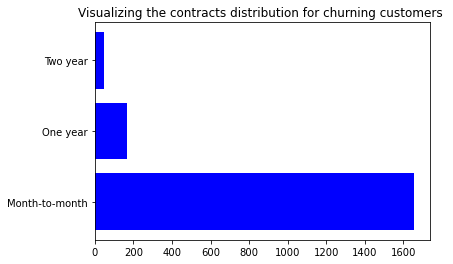

In [125]:
churn_in_time = df_customer_churn.pivot_table('Churn', index = 'Contract',aggfunc='count')
plt.title('Visualizing the contracts distribution for churning customers ')

    
plt.barh(churn_in_time.index, churn_in_time['Churn'], color='blue', align='center')

([<matplotlib.patches.Wedge at 0x7f28e5fd63a0>,
 [Text(-0.7662937396224232, 0.7891729244059772, '0'),
  Text(0.766293739622423, -0.7891729244059773, '1')],
 [Text(-0.4179784034304126, 0.4304579587668966, '74.5%'),
  Text(0.41797840343041254, -0.4304579587668967, '25.5%')])

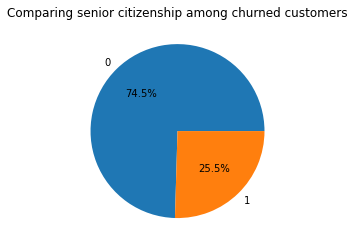

In [129]:
churn_in_time = df_customer_churn.pivot_table('Churn', index = 'SeniorCitizen',aggfunc='count')
plt.title("Comparing senior citizenship among churned customers")
plt.pie(churn_in_time['Churn'], labels = churn_in_time.index, autopct='%1.1f%%')